In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("salida.csv")
df

,NumThreads,Estrategia,Tiempo
0,1,Reduction,0.014597
1,1,Critical,0.016135
2,1,Ordered,0.009110
3,1,Reduction,0.005763
4,1,Critical,0.011012
...,...,...,...
1795,6,Critical,0.065257
1796,6,Ordered,0.008697
1797,6,Reduction,0.000946
1798,6,Critical,0.065172


In [4]:
df_grouped = df.groupby(["NumThreads", "Estrategia"])["Tiempo"].mean().reset_index()
df_grouped

,NumThreads,Estrategia,Tiempo
0,1,Critical,0.010968
1,1,Ordered,0.008521
2,1,Reduction,0.005811
3,2,Critical,0.038301
4,2,Ordered,0.008685
5,2,Reduction,0.002850
6,3,Critical,0.058731
7,3,Ordered,0.008740
8,3,Reduction,0.001933
9,4,Critical,0.065648


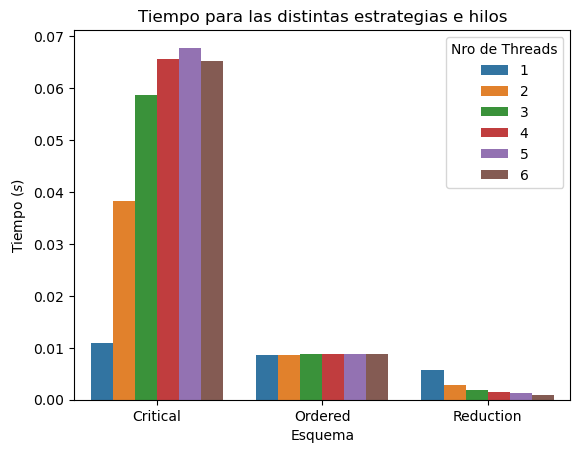

In [13]:
sns.barplot(df_grouped, x="Estrategia", y="Tiempo", hue="NumThreads")
plt.ylabel("Tiempo ($s$)")
plt.xlabel("Esquema")
plt.legend(title="Nro de Threads")
plt.title("Tiempo para las distintas estrategias e hilos")
plt.savefig("imgs/salida1.png")
plt.show()

In [15]:
dfSec = df_grouped[df_grouped["NumThreads"]==1]
dfPar = df_grouped[df_grouped["NumThreads"]!=1]

In [18]:
dfMerged = dfPar.merge(dfSec[["Estrategia", "Tiempo"]],\
                       how="inner",\
                        on="Estrategia",\
                        suffixes=("_par", "_sec"))

In [19]:
dfMerged

,NumThreads,Estrategia,Tiempo_par,Tiempo_sec
0,2,Critical,0.038301,0.010968
1,3,Critical,0.058731,0.010968
2,4,Critical,0.065648,0.010968
3,5,Critical,0.067815,0.010968
4,6,Critical,0.065239,0.010968
5,2,Ordered,0.008685,0.008521
6,3,Ordered,0.008740,0.008521
7,4,Ordered,0.008792,0.008521
8,5,Ordered,0.008802,0.008521
9,6,Ordered,0.008877,0.008521


In [20]:
dfMerged["Speedup"] = dfMerged["Tiempo_sec"] / dfMerged["Tiempo_par"]
dfMerged["Eficiencia"] = dfMerged["Speedup"] / dfMerged["NumThreads"]

In [21]:
dfMerged

,NumThreads,Estrategia,Tiempo_par,Tiempo_sec,Speedup,Eficiencia
0,2,Critical,0.038301,0.010968,0.286362,0.143181
1,3,Critical,0.058731,0.010968,0.186751,0.062250
2,4,Critical,0.065648,0.010968,0.167074,0.041769
3,5,Critical,0.067815,0.010968,0.161735,0.032347
4,6,Critical,0.065239,0.010968,0.168122,0.028020
5,2,Ordered,0.008685,0.008521,0.981079,0.490539
6,3,Ordered,0.008740,0.008521,0.974970,0.324990
7,4,Ordered,0.008792,0.008521,0.969133,0.242283
8,5,Ordered,0.008802,0.008521,0.968132,0.193626
9,6,Ordered,0.008877,0.008521,0.959882,0.159980


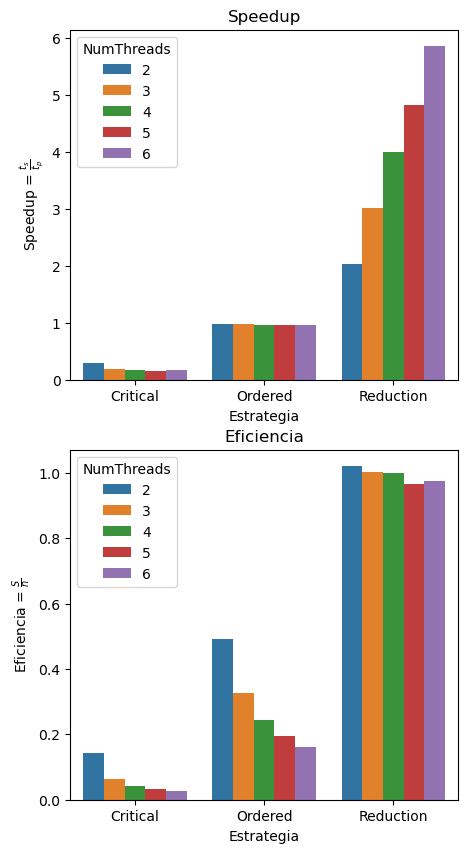

In [40]:
plt.figure(figsize=(5,10))
plt.subplot(211)
plt.title("Speedup")
sns.barplot(dfMerged, x="Estrategia", y="Speedup", hue="NumThreads")
plt.ylabel(r"Speedup = $\frac{t_s}{t_p}$")
plt.subplot(212)
plt.title("Eficiencia")
sns.barplot(dfMerged, x="Estrategia", y="Eficiencia", hue="NumThreads")
plt.ylabel(r"Eficiencia = $\frac{S}{n}$")
plt.savefig("imgs/salida2.png")
plt.show()

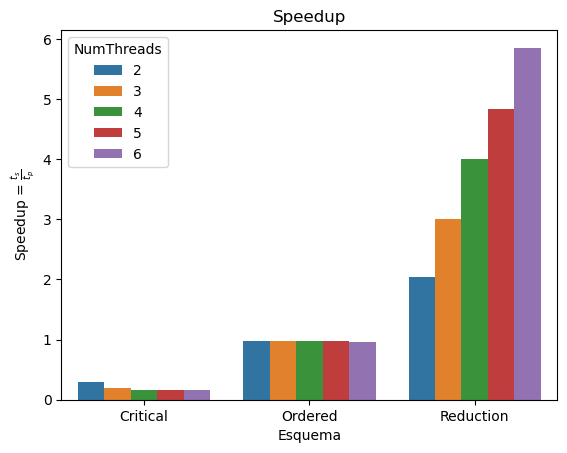

In [45]:
plt.title("Speedup")
sns.barplot(dfMerged, x="Estrategia", y="Speedup", hue="NumThreads")
plt.ylabel(r"Speedup = $\frac{t_s}{t_p}$")
plt.xlabel("Esquema")
plt.savefig("imgs/speedup.png")
plt.show()

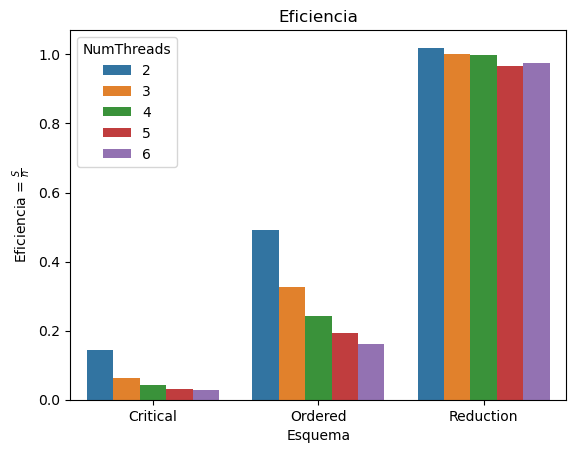

In [44]:
plt.title("Eficiencia")
sns.barplot(dfMerged, x="Estrategia", y="Eficiencia", hue="NumThreads")
plt.ylabel(r"Eficiencia = $\frac{S}{n}$")
plt.xlabel("Esquema")
plt.savefig("imgs/eficiencia.png")
plt.show()